# LangChain Agent with Azure cognitive services and OpenAI

In [ ]:
!pip install --upgrade azure-ai-formrecognizer 
!pip install --upgrade azure-cognitiveservices-speech 
!pip install --upgrade azure-ai-vision 

### Setting environmental variables

In [4]:
import os
os.environ["OPENAI_API_TYPE"] = openai_api_type
os.environ["OPENAI_API_VERSION"] = openai_api_version
os.environ["OPENAI_API_BASE"] = openai_api_base
os.environ["OPENAI_API_KEY"] = openai_api_key

NameError: name 'openai_api_type' is not defined

In [5]:
os.environ["AZURE_COGS_KEY"] = azure_cogs_key
os.environ["AZURE_COGS_ENDPOINT"] = azure_cogs_endpoint
os.environ["AZURE_COGS_REGION"] = azure_cogs_region

from langchain.agents.agent_toolkits import AzureCognitiveServicesToolkit

toolkit = AzureCognitiveServicesToolkit()

[tool.name for tool in toolkit.get_tools()]

['azure_cognitive_services_form_recognizer',
 'azure_cognitive_services_speech2text',
 'azure_cognitive_services_text2speech',
 'azure_cognitive_services_image_analysis']

In [6]:
[(tool.name, tool.description) for tool in toolkit.get_tools()]

[('azure_cognitive_services_form_recognizer',
  'A wrapper around Azure Cognitive Services Form Recognizer. Useful for when you need to extract text, tables, and key-value pairs from documents. Input should be a url to a document.'),
 ('azure_cognitive_services_speech2text',
  'A wrapper around Azure Cognitive Services Speech2Text. Useful for when you need to transcribe audio to text. Input should be a url to an audio file.'),
 ('azure_cognitive_services_text2speech',
  'A wrapper around Azure Cognitive Services Text2Speech. Useful for when you need to convert text to speech. '),
 ('azure_cognitive_services_image_analysis',
  'A wrapper around Azure Cognitive Services Image Analysis. Useful for when you need to analyze images. Input should be a url to an image.')]

## Agentic Approach

In [10]:
from langchain.chat_models import AzureChatOpenAI
from langchain.schema import HumanMessage

model = AzureChatOpenAI(
    deployment_name='gpt-35-turbo',
    openai_api_type="azure",
)

model(
    [
        HumanMessage(
            content="Translate this sentence from English to French. I love programming."
        )
    ]
)

AIMessage(content="J'aime programmer.", additional_kwargs={}, example=False)

### Initialize Agent

In [12]:
from langchain.agents import initialize_agent, AgentType

agent = initialize_agent(
    tools=toolkit.get_tools(),
    llm=model,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
)

In [13]:
print(agent.agent.llm_chain.prompt.messages[0].prompt.template)

Respond to the human as helpfully and accurately as possible. You have access to the following tools:

azure_cognitive_services_form_recognizer: A wrapper around Azure Cognitive Services Form Recognizer. Useful for when you need to extract text, tables, and key-value pairs from documents. Input should be a url to a document., args: {{{{'query': {{{{'title': 'Query', 'type': 'string'}}}}}}}}
azure_cognitive_services_speech2text: A wrapper around Azure Cognitive Services Speech2Text. Useful for when you need to transcribe audio to text. Input should be a url to an audio file., args: {{{{'query': {{{{'title': 'Query', 'type': 'string'}}}}}}}}
azure_cognitive_services_text2speech: A wrapper around Azure Cognitive Services Text2Speech. Useful for when you need to convert text to speech. , args: {{{{'query': {{{{'title': 'Query', 'type': 'string'}}}}}}}}
azure_cognitive_services_image_analysis: A wrapper around Azure Cognitive Services Image Analysis. Useful for when you need to analyze imag

Respond to the human as helpfully and accurately as possible. You have access to the following tools:

azure_cognitive_services_form_recognizer: A wrapper around Azure Cognitive Services Form Recognizer. Useful for when you need to extract text, tables, and key-value pairs from documents. Input should be a url to a document., args: {{{{'query': {{{{'title': 'Query', 'type': 'string'}}}}}}}}
azure_cognitive_services_speech2text: A wrapper around Azure Cognitive Services Speech2Text. Useful for when you need to transcribe audio to text. Input should be a url to an audio file., args: {{{{'query': {{{{'title': 'Query', 'type': 'string'}}}}}}}}
azure_cognitive_services_text2speech: A wrapper around Azure Cognitive Services Text2Speech. Useful for when you need to convert text to speech. , args: {{{{'query': {{{{'title': 'Query', 'type': 'string'}}}}}}}}
azure_cognitive_services_image_analysis: A wrapper around Azure Cognitive Services Image Analysis. Useful for when you need to analyze images. Input should be a url to an image., args: {{{{'query': {{{{'title': 'Query', 'type': 'string'}}}}}}}}

Use a json blob to specify a tool by providing an action key (tool name) and an action_input key (tool input).

Valid "action" values: "Final Answer" or azure_cognitive_services_form_recognizer, azure_cognitive_services_speech2text, azure_cognitive_services_text2speech, azure_cognitive_services_image_analysis

Provide only ONE action per $JSON_BLOB, as shown:

```
{{
  "action": $TOOL_NAME,
  "action_input": $INPUT
}}
```

Follow this format:

Question: input question to answer
Thought: consider previous and subsequent steps
Action:
...
```

Begin! Reminder to ALWAYS respond with a valid json blob of a single action. Use tools if necessary. Respond directly if appropriate. Format is Action:```$JSON_BLOB```then Observation:.
Thought:

### Example with custom vision

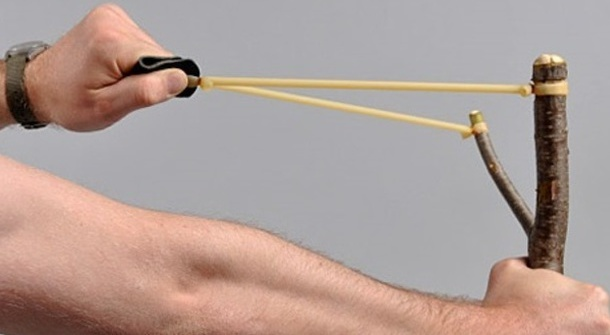

In [14]:
from IPython.display import Image, display
display(Image('https://www.stylo24.it/wp-content/uploads/2020/03/fionda.jpg', width=600, unconfined=True))

In [15]:
description = agent.run("what shows the following image?:"
    "https://www.stylo24.it/wp-content/uploads/2020/03/fionda.jpg")

print(description)



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "azure_cognitive_services_image_analysis",
  "action_input": {
    "query": "https://www.stylo24.it/wp-content/uploads/2020/03/fionda.jpg"
  }
}
```

Observation: Caption: a person holding a slingshot
Tags: person, tool, nail, hand, holding, needle
Thought:Based on the image you provided, it appears to be a person holding a slingshot. Would you like me to look up more information about slingshots or do you have any other questions?

> Finished chain.
Based on the image you provided, it appears to be a person holding a slingshot. Would you like me to look up more information about slingshots or do you have any other questions?


Based on the image you provided, it appears to be a person holding a slingshot. Would you like me to look up more information about slingshots or do you have any other questions?

In [16]:
agent.run("what happens if the person lets the slingshot go?:'https://www.stylo24.it/wp-content/uploads/2020/03/fionda.jpg'")



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "azure_cognitive_services_image_analysis",
  "action_input": {
    "query": "https://www.stylo24.it/wp-content/uploads/2020/03/fionda.jpg"
  }
}
```

Observation: Caption: a person holding a slingshot
Tags: person, tool, nail, hand, holding, needle
Thought:Based on the image analysis, it appears that the person in the photo is holding a slingshot. 

To answer the original question, if the person were to let go of the slingshot, the projectile (such as a stone or ball) would be launched forward due to the tension and force created by the slingshot.

> Finished chain.


'Based on the image analysis, it appears that the person in the photo is holding a slingshot. \n\nTo answer the original question, if the person were to let go of the slingshot, the projectile (such as a stone or ball) would be launched forward due to the tension and force created by the slingshot.'

Based on the image analysis, it appears that the person in the photo is holding a slingshot. 
To answer the original question, if the person were to let go of the slingshot, the projectile (such as a stone or ball) would be launched forward due to the tension and force created by the slingshot.

## Example with Form recognizer

In [ ]:
from IPython.display import Image, display
display(Image('https://www.whiteelysee.fr/design/wp-content/uploads/2022/01/custom-t-shirt-order-form-template-free.jpg', width=600))

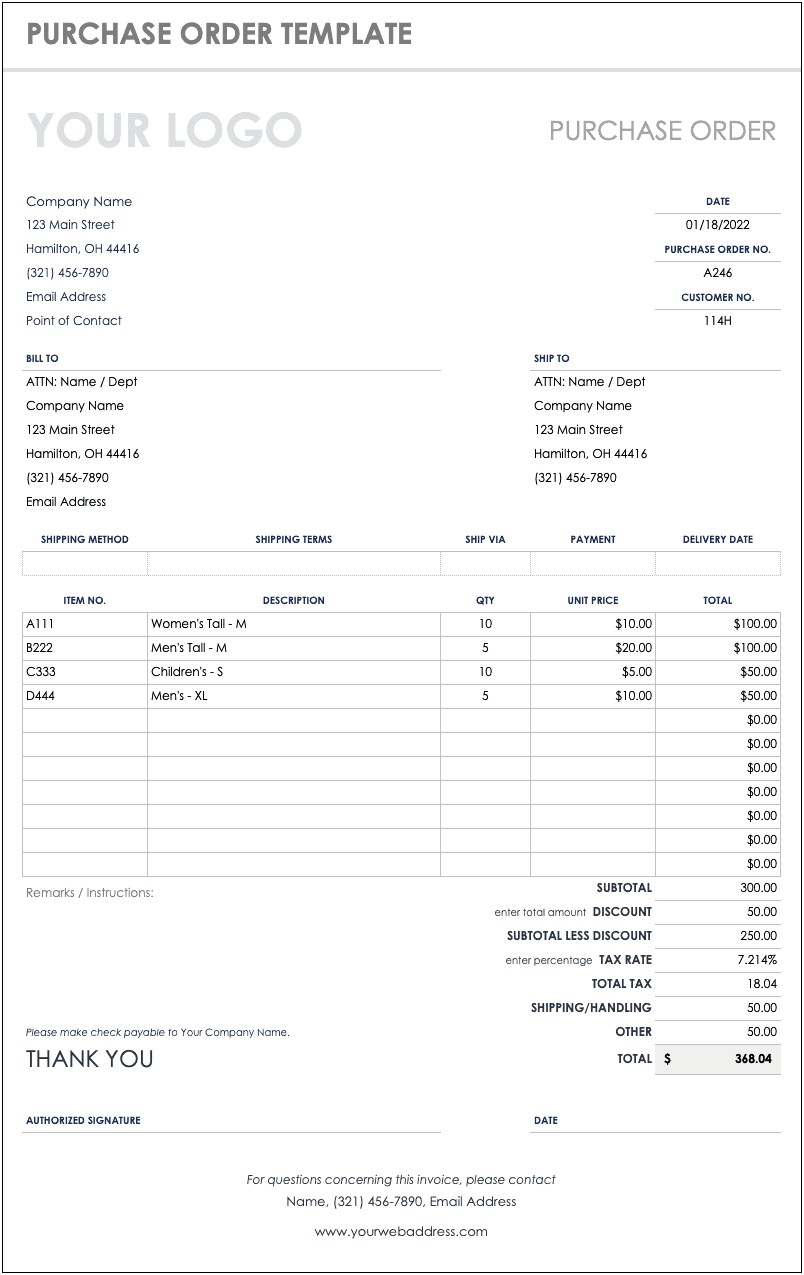

In [20]:
agent.run("what is the due date of the following invoice?"
    "https://www.whiteelysee.fr/design/wp-content/uploads/2022/01/custom-t-shirt-order-form-template-free.jpg")



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "azure_cognitive_services_form_recognizer",
  "action_input": {
    "query": "https://www.whiteelysee.fr/design/wp-content/uploads/2022/01/custom-t-shirt-order-form-template-free.jpg"
  }
}
``` 

Observation: Content: PURCHASE ORDER TEMPLATE YOUR LOGO PURCHASE ORDER Company Name 123 Main Street Hamilton, OH 44416 (321) 456-7890 Email Address Point of Contact DATE 01/18/2022 PURCHASE ORDER NO. A246 CUSTOMER NO. 114H BILL TO ATTN: Name / Dept Company Name 123 Main Street Hamilton, OH 44416 (321) 456-7890 Email Address SHIP TO ATTN: Name / Dept Company Name 123 Main Street Hamilton, OH 44416 (321) 456-7890 SHIPPING METHOD SHIPPING TERMS SHIP VIA PAYMENT DELIVERY DATE ITEM NO. DESCRIPTION QTY UNIT PRICE TOTAL A111 Women's Tall - M 10 $10.00 $100.00 B222 Men's Tall - M 5 $20.00 $100.00 C333 Children's - S 10 $5.00 $50.00 D444 Men's - XL 5 $10.00 $50.00 $0.00 $0.00 $0.00 $0.00 $0.00 $0.00 $0.00 Remarks / Instructions: Please m

'The due date of the invoice is not provided in the document. It only contains the purchase order details, item details, and the total amount due.'

'The due date of the invoice is not provided in the document. It only contains the purchase order details, item details, and the total amount due.'


In [21]:
agent.run("what are all men's skus?"
    "https://www.whiteelysee.fr/design/wp-content/uploads/2022/01/custom-t-shirt-order-form-template-free.jpg")



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "azure_cognitive_services_form_recognizer",
  "action_input": {
    "query": "https://www.whiteelysee.fr/design/wp-content/uploads/2022/01/custom-t-shirt-order-form-template-free.jpg"
  }
}
```

Observation: Content: PURCHASE ORDER TEMPLATE YOUR LOGO PURCHASE ORDER Company Name 123 Main Street Hamilton, OH 44416 (321) 456-7890 Email Address Point of Contact DATE 01/18/2022 PURCHASE ORDER NO. A246 CUSTOMER NO. 114H BILL TO ATTN: Name / Dept Company Name 123 Main Street Hamilton, OH 44416 (321) 456-7890 Email Address SHIP TO ATTN: Name / Dept Company Name 123 Main Street Hamilton, OH 44416 (321) 456-7890 SHIPPING METHOD SHIPPING TERMS SHIP VIA PAYMENT DELIVERY DATE ITEM NO. DESCRIPTION QTY UNIT PRICE TOTAL A111 Women's Tall - M 10 $10.00 $100.00 B222 Men's Tall - M 5 $20.00 $100.00 C333 Children's - S 10 $5.00 $50.00 D444 Men's - XL 5 $10.00 $50.00 $0.00 $0.00 $0.00 $0.00 $0.00 $0.00 $0.00 Remarks / Instructions: Please ma

"The available men's item descriptions are: Men's Tall - M, Men's - XL."

The available men's item descriptions are: Men's Tall - M, Men's - XL.

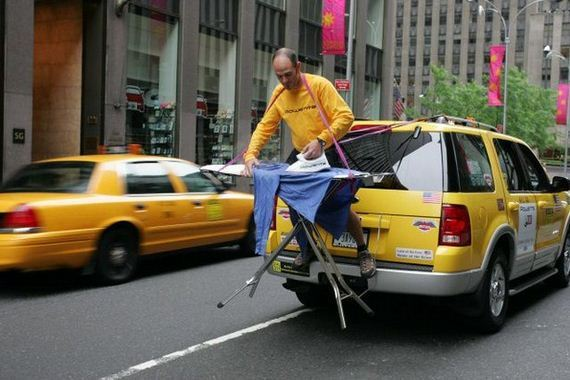

In [28]:
from IPython.display import Image, display
display(Image('https://i.postimg.cc/BZLnSQrd/taxi.jpg', width=600, unconfined=True))

In [27]:
agent.run(
    "What is unusual about this picture?:"
    "https://i.postimg.cc/BZLnSQrd/taxi.jpg"
)




> Entering new AgentExecutor chain...
Thought: I can use Azure Cognitive Services Image Analysis to analyze the image and detect any unusual features.
Action:
```
{
  "action": "azure_cognitive_services_image_analysis",
  "action_input": {
    "query": "https://i.postimg.cc/BZLnSQrd/taxi.jpg"
  }
}
```

Observation: Caption: a man ironing clothes in the back of a van
Objects: person, taxi, car
Tags: land vehicle, vehicle, wheel, outdoor, road, taxi, building, person, clothing, transport, tire, street, footwear, vehicle registration plate, yellow, riding, city, car
Text: SC
Thought:Based on the image analysis, there is a man ironing clothes in the back of a van which may be considered unusual.
Action:
```
{
  "action": "Final Answer",
  "action_input": "The unusual feature in the picture is a man ironing clothes in the back of a van."
}
```


> Finished chain.


'The unusual feature in the picture is a man ironing clothes in the back of a van.'

## Multi-modal

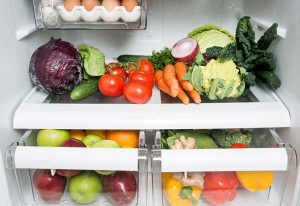

In [45]:
display(Image('https://www.awamipolitics.com/wp-content/uploads/2017/01/refrigerator-300x206.jpg', width=600, unconfined=True))

In [35]:
agent.run(
    "Tell me what I can cook with the ingredients in the following picture and read it out loud"
    "https://www.awamipolitics.com/wp-content/uploads/2017/01/refrigerator-300x206.jpg"
)




> Entering new AgentExecutor chain...
Action:
```
{
  "action": "azure_cognitive_services_image_analysis",
  "action_input": {
    "query": "https://www.awamipolitics.com/wp-content/uploads/2017/01/refrigerator-300x206.jpg"
  }
}
```

Observation: Caption: a refrigerator full of vegetables and eggs
Tags: food, natural foods, produce, food group, diet food, vegan nutrition, whole food, local food, kitchen appliance, vegetarian food, superfood, appliance, ingredient, refrigerator, staple food, tomato, vegetable, carrot, cucumber, home appliance, indoor, fruit, container
Thought:To find a recipe based on the ingredients in the picture, I can use a recipe search engine like Yummly or Allrecipes. However, since I don't have access to the specific quantities of each ingredient, I can suggest some general recipes that can be made with the ingredients in the picture. 
Action:
```
{
  "action": "azure_cognitive_services_text2speech",
  "action_input": {
    "query": "You can make a salad with

'You can make a salad with the tomatoes, cucumber, and carrots. You can also make an omelette with the eggs and vegetables. Another option is to make a stir fry with the vegetables and eggs.'

# Hard-coded approach

In [40]:
[tool.name for tool in toolkit.get_tools()]

['azure_cognitive_services_form_recognizer',
 'azure_cognitive_services_speech2text',
 'azure_cognitive_services_text2speech',
 'azure_cognitive_services_image_analysis']

In [49]:
toolkit = AzureCognitiveServicesToolkit().get_tools()
tools_image= [toolkit[3]]
tools_image

[AzureCogsImageAnalysisTool(name='azure_cognitive_services_image_analysis', description='A wrapper around Azure Cognitive Services Image Analysis. Useful for when you need to analyze images. Input should be a url to an image.', args_schema=None, return_direct=False, verbose=False, callbacks=None, callback_manager=None, tags=None, metadata=None, handle_tool_error=False, azure_cogs_key='', azure_cogs_endpoint='', vision_service=<azure.ai.vision.VisionServiceOptions object at 0x000001EAA8742B30>, analysis_options=<azure.ai.vision.ImageAnalysisOptions object at 0x000001EAA87402E0>)]

In [48]:
from langchain.agents import initialize_agent
from langchain.agents import AgentType

agent_image = initialize_agent(
    tools=tools_image,
    llm=model,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    output_key='img_desc'
)

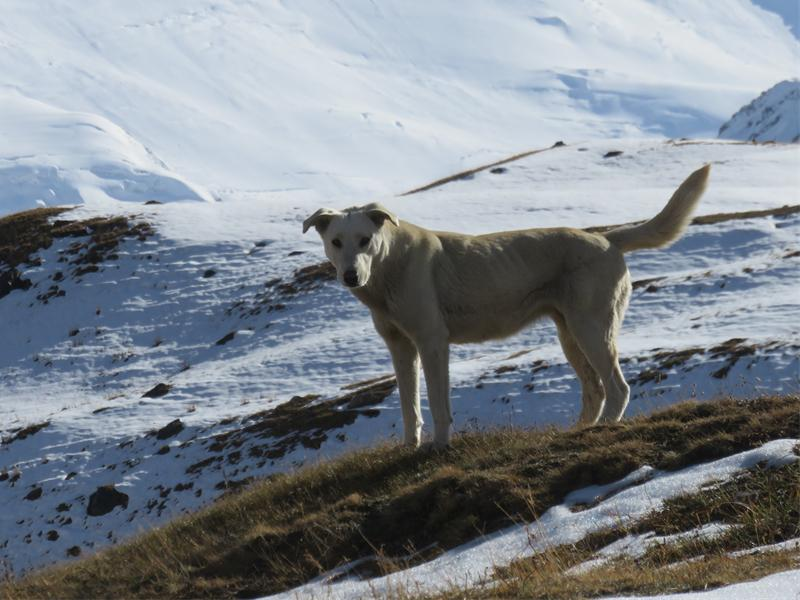

In [46]:
display(Image('https://i.redd.it/diawvlriobq11.jpg', width=600, unconfined=True))

In [63]:
story = agent_image("Tell me a story about the following picture:" "https://i.redd.it/diawvlriobq11.jpg")



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "azure_cognitive_services_image_analysis",
  "action_input": {
    "query": "https://i.redd.it/diawvlriobq11.jpg"
  }
}
```


Observation: Caption: a dog standing on a snowy hill
Objects: dog
Tags: outdoor, animal, mammal, snow, freezing, dog breed, dog, mountain, covered, winter
Thought:Once upon a time, in a far-off land, there was a dog named Max. Max was a very curious dog who loved to explore the outdoors. One winter day, Max ran out into the snowy hills and found himself standing on top of a beautiful mountain. As he looked out over the vast expanse of white, he felt a sense of peace wash over him. 

Max had never seen anything like this before. The snow was so deep that it almost covered his entire body. He felt the cold seeping into his bones, but he didn't mind. The beauty of the surrounding mountains and trees made him forget about the cold. 

For hours, Max ran up and down the mountain, exploring every nook an

In [50]:
toolkit = AzureCognitiveServicesToolkit().get_tools()
tools_speech= [toolkit[2]]
tools_speech

[AzureCogsText2SpeechTool(name='azure_cognitive_services_text2speech', description='A wrapper around Azure Cognitive Services Text2Speech. Useful for when you need to convert text to speech. ', args_schema=None, return_direct=False, verbose=False, callbacks=None, callback_manager=None, tags=None, metadata=None, handle_tool_error=False, azure_cogs_key='', azure_cogs_region='', speech_language='en-US', speech_config=<azure.cognitiveservices.speech.SpeechConfig object at 0x000001EAA7E08220>)]

In [51]:
agent_speech = initialize_agent(
    tools=tools_speech,
    llm=model,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    output_key='audio'
)

In [68]:
agent_speech(f"Read me aloud the following transcript: {story}")



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "azure_cognitive_services_text2speech",
  "action_input": {
      "query": "Max was a curious dog who loved the outdoors. One winter day, he found himself standing on top of a beautiful mountain covered in deep snow. He spent hours exploring every nook and cranny, chasing snowflakes, and sniffing out animal tracks. When he got tired, he curled up in the snow for a nap and woke up to a beautiful day. Max was proud of himself for exploring such a beautiful place and couldn't wait to come back for more adventures in the snowy hills."
  }
}
```


Observation: C:\Users\vaalt\AppData\Local\Temp\tmpiyrz6h4i.wav
Thought:Action:
```
{
  "action": "azure_cognitive_services_text2speech",
  "action_input": {
      "query": "Max was a curious dog who loved the outdoors. One winter day, he found himself standing on top of a beautiful mountain covered in deep snow. He spent hours exploring every nook and cranny, chasing snowflakes, and

{'input': 'Read me aloud the following transcript: {\'input\': \'Tell me a story about the following picture:https://i.redd.it/diawvlriobq11.jpg\', \'output\': "Max was a curious dog who loved the outdoors. One winter day, he found himself standing on top of a beautiful mountain covered in deep snow. He spent hours exploring every nook and cranny, chasing snowflakes, and sniffing out animal tracks. When he got tired, he curled up in the snow for a nap and woke up to a beautiful day. Max was proud of himself for exploring such a beautiful place and couldn\'t wait to come back for more adventures in the snowy hills."}',
 'output': 'Is there anything else you would like me to do for you?'}

## Putting all together

In [70]:
from langchain.chains import SimpleSequentialChain, LLMChain
from langchain.prompts import PromptTemplate

In [71]:
overall_chain = SimpleSequentialChain(chains=[agent_image, agent_speech], verbose = True)

In [73]:
overall_chain("Tell me a story about the following picture and read it aloud:" "https://i.redd.it/diawvlriobq11.jpg")



> Entering new SimpleSequentialChain chain...


> Entering new AgentExecutor chain...
Action:
```
{
  "action": "azure_cognitive_services_image_analysis",
  "action_input": {
    "query": "https://i.redd.it/diawvlriobq11.jpg"
  }
}
```


Observation: Caption: a dog standing on a snowy hill
Objects: dog
Tags: outdoor, animal, mammal, snow, freezing, dog breed, dog, mountain, covered, winter
Thought:Once upon a time, in a small village nestled in the mountains, there was a dog named Max. Max was a friendly golden retriever who loved to play in the snow. One winter day, Max's owner decided to take him on a hike up the mountain. As they reached the top, Max couldn't contain his excitement and ran ahead to the snowy hill. He climbed to the top and stood proudly, taking in the beautiful view of the snow-covered landscape. His owner smiled and snapped a photo of Max, capturing the moment forever. From that day on, Max and his owner would often make the trek up the mountain, and Max would al

{'input': 'Tell me a story about the following picture and read it aloud:https://i.redd.it/diawvlriobq11.jpg',
 'output': 'I should wait for the human to respond or ask if there is anything else they would like to know.'}